# Mushroom

# Introduction of Mushroom Dataset

#### The Mushrooms Database contains data about several thousands types of mushrooms, both edible and poisonous. 

#### I have used several predictive models to findout the type (edible or poisonous) of the species. 
The data contains attributes for the cap (shape, surface, color), gill (attachment, spacing, size, color), bruises, stalk (shape, root, surface above ring, surface below ring, color above ring, color below ring), veil (type, color), ring (number, type), spore print color, population, habitat.

In [3]:
# importing necessary libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
# loading the mushroom dataset

mushroom_food = pd.read_csv('mushrooms.csv')

In [5]:
# displaying the top head

mushroom_food.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [6]:
mushroom_food.shape

(8124, 23)

#### The above statment shows that there is altogether 8124 rows and 23 columns in entire data set.

In [7]:
# lets find out is there any null values in all the cloumns

pd.set_option('display.max_rows',None)

In [8]:
mushroom_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#### The above statement help us to know that there is no null values in all the 23 columns showing all object.

## Finding out whether the dataset is balanced or imbalanced

In [9]:
mushroom_food["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

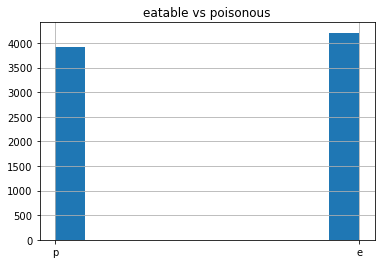

In [10]:
#using hist to visualize the eatable and poisonous mushroom

mushroom_food["class"].hist(grid = True)
plt.title("eatable vs poisonous")
plt.show()

### The above graph helps me to find out that there is 4208 eatable mushrrom and 3916 poisonous mushrrom which clearly indicate that the particular dataset is balanced.

# Data Preprocessing

In [11]:
# Using label encoder

le = LabelEncoder()
mushroom_food = mushroom_food.apply(LabelEncoder().fit_transform)   
mushroom_food.head()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  2           3        5  
1            1          4                  3           2        1  
2            1          4                  3           2        3  
3            1          4                  2           3        5  
4            1          0                  3           0        1  

[5 rows x 23 columns]

### The Encoder command helps me to convert all the columns object into integer dataset.

In [12]:
mushroom_food.describe()

class    cap-shape  cap-surface    cap-color      bruises  \
count  8124.000000  8124.000000  8124.000000  8124.000000  8124.000000   
mean      0.482029     3.348104     1.827671     4.504677     0.415559   
std       0.499708     1.604329     1.229873     2.545821     0.492848   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     2.000000     0.000000     3.000000     0.000000   
50%       0.000000     3.000000     2.000000     4.000000     0.000000   
75%       1.000000     5.000000     3.000000     8.000000     1.000000   
max       1.000000     5.000000     3.000000     9.000000     1.000000   

              odor  gill-attachment  gill-spacing    gill-size   gill-color  \
count  8124.000000      8124.000000   8124.000000  8124.000000  8124.000000   
mean      4.144756         0.974151      0.161497     0.309207     4.810684   
std       2.103729         0.158695      0.368011     0.462195     3.540359   
min       0.000000         0.000000      0.000000     0.000000     0.000000   
25%       2.000000         1.000000      0.000000     0.000000     2.000000   
50%       5.000000         1.000000      0.000000     0.000000     5.000000   
75%       5.000000         1.000000      0.000000     1.000000     7.000000   
max       8.000000         1.000000      1.000000     1.000000    11.000000   

       ...  stalk-surface-below-ring  stalk-color-above-ring  \
count  ...               8124.000000             8124.000000   
mean   ...                  1.603644                5.816347   
std    ...                  0.675974                1.901747   
min    ...                  0.000000                0.000000   
25%    ...                  1.000000                6.000000   
50%    ...                  2.000000                7.000000   
75%    ...                  2.000000                7.000000   
max    ...                  3.000000                8.000000   

       stalk-color-below-ring  veil-type   veil-color  ring-number  \
count             8124.000000     8124.0  8124.000000  8124.000000   
mean                 5.794682        0.0     1.965534     1.069424   
std                  1.907291        0.0     0.242669     0.271064   
min                  0.000000        0.0     0.000000     0.000000   
25%                  6.000000        0.0     2.000000     1.000000   
50%                  7.000000        0.0     2.000000     1.000000   
75%                  7.000000        0.0     2.000000     1.000000   
max                  8.000000        0.0     3.000000     2.000000   

         ring-type  spore-print-color   population      habitat  
count  8124.000000        8124.000000  8124.000000  8124.000000  
mean      2.291974           3.596750     3.644018     1.508616  
std       1.801672           2.382663     1.252082     1.719975  
min       0.000000           0.000000     0.000000     0.000000  
25%       0.000000           2.000000     3.000000     0.000000  
50%       2.000000           3.000000     4.000000     1.000000  
75%       4.000000           7.000000     4.000000     2.000000  
max       4.000000           8.000000     5.000000     6.000000  

[8 rows x 23 columns]

### The above table help us to know is there any missing values in dataset. It also help us to know the mean and standard diviation from the above table.The difference between mean and median(50%) help us to understand is there any outliers in dataset.As there is hardly any difference between mean and median so there is no outliers in dataset

In [13]:
# using duplicate command to remove unwanted data

mushroom_food.duplicated().sum()

0

In [15]:
# Correlation in table format

corr_mat = mushroom_food.corr()

In [16]:
corr_mat

class  cap-shape  cap-surface  cap-color  \
class                     1.000000   0.052951     0.178446  -0.031384   
cap-shape                 0.052951   1.000000    -0.050454  -0.048203   
cap-surface               0.178446  -0.050454     1.000000  -0.019402   
cap-color                -0.031384  -0.048203    -0.019402   1.000000   
bruises                  -0.501530  -0.035374     0.070228  -0.000764   
odor                     -0.093552  -0.021935     0.045233  -0.387121   
gill-attachment           0.129200   0.078865    -0.034180   0.041436   
gill-spacing             -0.348387   0.013196    -0.282306   0.144259   
gill-size                 0.540024   0.054050     0.208100  -0.169464   
gill-color               -0.530566  -0.006039    -0.161017   0.084659   
stalk-shape              -0.102019   0.063794    -0.014123  -0.456496   
stalk-root               -0.379361   0.030191    -0.126245   0.321274   
stalk-surface-above-ring -0.334593  -0.030417     0.089090  -0.060837   
stalk-surface-below-ring -0.298801  -0.032591     0.107965  -0.047710   
stalk-color-above-ring   -0.154003  -0.031659     0.066050   0.002364   
stalk-color-below-ring   -0.146730  -0.030390     0.068885   0.008057   
veil-type                      NaN        NaN          NaN        NaN   
veil-color                0.145142   0.072560    -0.016603   0.036130   
ring-number              -0.214366  -0.106534    -0.026147  -0.005822   
ring-type                -0.411771  -0.025457    -0.106407   0.162513   
spore-print-color         0.171961  -0.073416     0.230364  -0.293523   
population                0.298686   0.063413     0.021555  -0.144770   
habitat                   0.217179  -0.042221     0.163887   0.033925   

                           bruises      odor  gill-attachment  gill-spacing  \
class                    -0.501530 -0.093552         0.129200     -0.348387   
cap-shape                -0.035374 -0.021935         0.078865      0.013196   
cap-surface               0.070228  0.045233        -0.034180     -0.282306   
cap-color                -0.000764 -0.387121         0.041436      0.144259   
bruises                   1.000000 -0.061825         0.137359     -0.299473   
odor                     -0.061825  1.000000        -0.059590      0.063936   
gill-attachment           0.137359 -0.059590         1.000000      0.071489   
gill-spacing             -0.299473  0.063936         0.071489      1.000000   
gill-size                -0.369596  0.310495         0.108984     -0.108333   
gill-color                0.527120 -0.129213        -0.128567      0.100193   
stalk-shape               0.099364  0.459766         0.186485      0.080895   
stalk-root                0.244188 -0.205215         0.144063      0.350548   
stalk-surface-above-ring  0.460824  0.118617        -0.088916     -0.212359   
stalk-surface-below-ring  0.458983  0.061820        -0.116177     -0.213775   
stalk-color-above-ring    0.083538  0.174532         0.099299      0.274574   
stalk-color-below-ring    0.092874  0.169407         0.097160      0.253505   
veil-type                      NaN       NaN              NaN           NaN   
veil-color                0.119770 -0.057747         0.897518      0.073363   
ring-number               0.056788  0.111905         0.093236      0.243014   
ring-type                 0.692973 -0.281387        -0.146689     -0.195897   
spore-print-color        -0.285008  0.469055        -0.029524      0.047323   
population                0.088137 -0.043623         0.165575     -0.529253   
habitat                  -0.075095 -0.026610        -0.030304     -0.154680   

                          gill-size  gill-color  ...  \
class                      0.540024   -0.530566  ...   
cap-shape                  0.054050   -0.006039  ...   
cap-surface                0.208100   -0.161017  ...   
cap-color                 -0.169464    0.084659  ...   
bruises                   -0.369596    0.527120  ...   
odor                       0.310495   -0.12

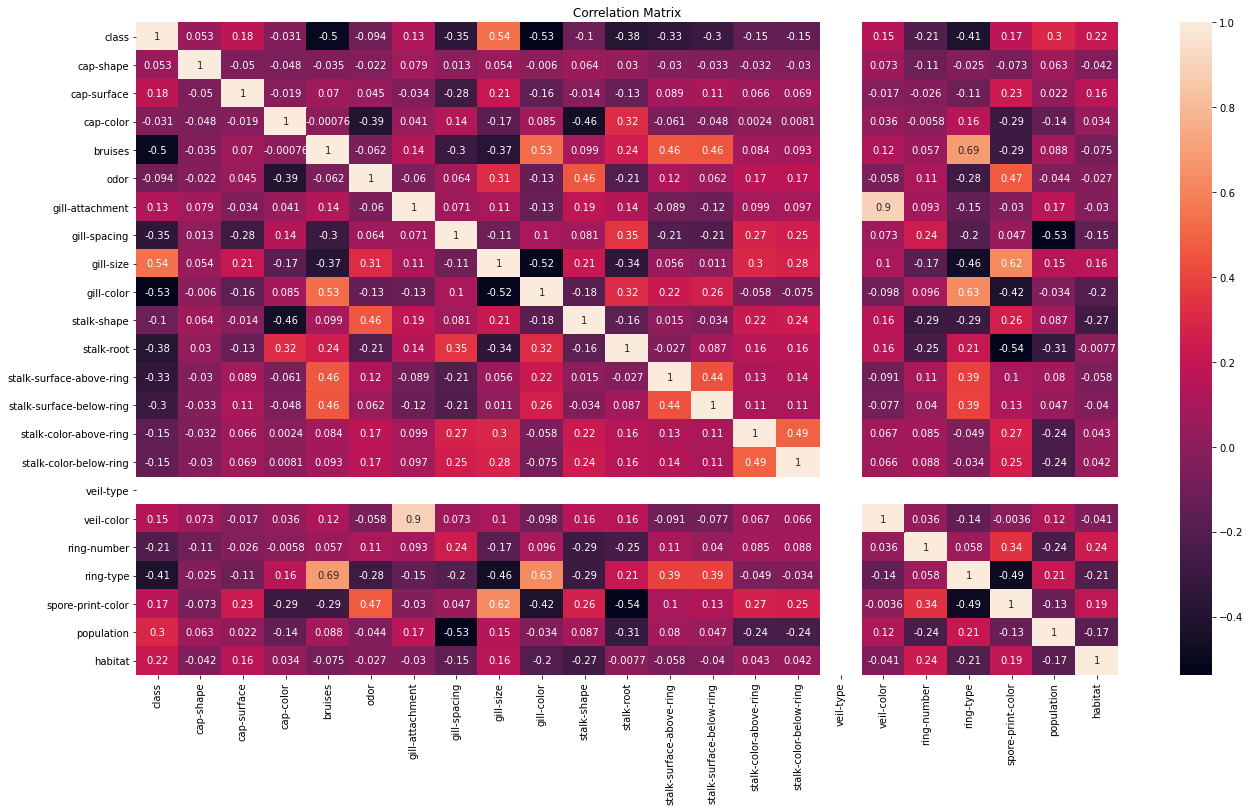

In [17]:
#visualize through heat map

plt.figure(figsize = [22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

### The above table and heat map helps us to find out how class is inter related to other factors.It is found that factor which affects class the most is gill size i.e 54% and the factor which affects the class least is gill color i.e -53%

In [18]:
# correlation value of all the column with target variable is displayed below in ascending order
corr_matrix = mushroom_food.corr()
corr_matrix["class"].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

### The above table  helps us to find out how class is inter related to other factors.It is found that factor which affects class the most is gill size i.e 54% and the factor which affects the class least is gill color i.e -53%

# Prediction of Machine Learning

In [19]:
# divide dataset into feature and label

y = mushroom_food['class']
x = mushroom_food.drop(columns = ['class'])

In [20]:
y

0       1
1       0
2       0
3       1
4       0
5       0
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      1
18      1
19      1
20      0
21      1
22      0
23      0
24      0
25      1
26      0
27      0
28      0
29      0
30      0
31      1
32      0
33      0
34      0
35      0
36      0
37      1
38      0
39      0
40      0
41      0
42      0
43      1
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      1
54      1
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      1
79      0
80      0
81      1
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [21]:
x

cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             5            2          4        1     6                1   
1             5            2          9        1     0                1   
2             0            2          8        1     3                1   
3             5            3          8        1     6                1   
4             5            2          3        0     5                1   
5             5            3          9        1     0                1   
6             0            2          8        1     0                1   
7             0            3          8        1     3                1   
8             5            3          8        1     6                1   
9             0            2          9        1     0                1   
10            5            3          9        1     3                1   
11            5            3          9        1     0                1   
12            0            2          9        1     0                1   
13            5            3          8        1     6                1   
14            5            0          4        0     5                1   
15            4            0          3        0     5                1   
16            2            0          8        0     5                1   
17            5            2          4        1     6                1   
18            5            3          8        1     6                1   
19            5            2          4        1     6                1   
20            0            2          9        1     0                1   
21            5            3          4        1     6                1   
22            0            3          9        1     3                1   
23            0            3          8        1     0                1   
24            0            2          8        1     3                1   
25            2            2          8        1     6                1   
26            5            3          9        1     0                1   
27            5            3          8        1     3                1   
28            2            0          4        0     5                1   
29            5            2          9        1     0                1   
30            0            2          9        1     3                1   
31            5            3          8        1     6                1   
32            5            3          9        1     3                1   
33            5            3          4        1     3                1   
34            0            3          9        1     3                1   
35            5            0          9        1     3                1   
36            4            0          3        0     5                1   
37            5            3          4        1     6                1   
38            5            0          9        1     0                1   
39            0            2          9        1     3                1   
40            0            3          9        1     0                1   
41            5            3          9        1     3                1   
42            5            0          4        0     5                1   
43            5            3          8        1     6                1   
44            5            2          9        1     0                1   
45            5            3          8        1     0                1   
46            5            3          9        1     3                1   
47            5            2          8        1     3                1   
48            5            3          9        1     3                1   
49            2            3          9        1     3                1   
50            5            3          4        1     0                1   
51            5            2          8        1     3                1   
52            0            2   

In [23]:
# data scaling

Scaler = StandardScaler()
x_Scaled = Scaler.fit_transform(x)
x_Scaled

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

#### The above data scaling is used to bring all the data in same range for testing and training purpose

In [24]:
# training and test model

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)

### I have used 25% of dataset for testing purpose and 75% for training.

## Model Selection

#### logistic regression

In [41]:
# logistic regression
log_model = LogisticRegression()

In [42]:
log_model.fit(x_train, y_train)

C:\Users\Sunil Gupta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
print(f"---Logistic Regression: {log_model.score(x_test, y_test)}")

---Logistic Regression: 0.9512555391432792


In [44]:
predictions = log_model.predict(x_test)
log_model.score(x_test , y_test)

0.9512555391432792

In [45]:
accuracy_score(y_test , predictions)

0.9512555391432792

## Logistic Regression is 0.9512555391432792

#### Decision Tree Model

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0 , max_depth = 5)
dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [34]:
dt.score(x_train , y_train)

0.9780075496471361

In [35]:
predictions = dt.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , predictions)

0.983259478089611

## DecisionTree is 0.983259478089611

#### Random Forest Model

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 5)

In [38]:
rf.fit(x_train , y_train)
rf.score(x_train , y_train)

0.9904808796980141

In [39]:
predictions = rf.predict(x_test)
rf.score(x_test , y_test)

0.9940915805022157

In [40]:
accuracy_score(y_test , predictions)

0.9940915805022157

## RandomForest is 0.9940915805022157

### Conclusion

### I was able to predict with very high accuracy the poisonous and edible mushrooms based on the three models used, Random Forest, logistic regression and Decision Tree Model.

Inference -
1. Decision Tree Accuracy - 98.3%

2. logistic regression - 95.1%

2. Random Forest Accuracy - 99.4%

Hence, Ramdom Forest is best out of three models used for prediction.